In [65]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
sklearn.__version__

'0.24.2'

# CR

In [9]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [10]:
num = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
num

3767

## Get distribution

In [11]:
nodes_names = set()
all_types_dict = {}

types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
print(types)

for t in types:
    all_types_dict[t] = 0

for i, n in enumerate(df['node_id1']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id1'][i]] += 1
        
for i, n in enumerate(df['node_id2']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id2'][i]] += 1
        
print(all_types_dict)

['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}


## Training and results

### New approach

In [6]:
def get_targets(df, cond, names):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    targets_dict = {names[i]: None for i in range(len(names))}
    checked = []

    for i, n in enumerate(df['node_id1']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                    id_ = types.index(df['label_id1'][i])
                    current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
            
    ####################################
    
    for i, n in enumerate(df['node_id2']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id2'][i]] + 1) / all_types_dict[df['label_id2'][i]] < cond:
                    id_ = types.index(df['label_id2'][i])
                    current_types_dict[df['label_id2'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
        
    return list(targets_dict.values())

In [109]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# adj = pd.DataFrame(inputs)

# node_names = pd.concat([df['node_id1'], df['node_id2']], axis=0).unique()
# node_names = sorted(list(map(lambda n: int(n.split('_')[1]), node_names)))

# adj.index = node_names
# adj

In [18]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# for i, n in enumerate(df['node_id1']):
#     row = int(n.split('_')[1])
#     col = int(df['node_id2'][i].split('_')[1])
#     names[row] = n
#     names[col] = df['node_id2'][i]
#     inputs[row, col] = 1
#     inputs[col, row] = 1

# targets = get_targets(df, 2., names)

# np.save('adjacency_matrix.npy', inputs)
# np.save('classes.npy', np.array(targets))

In [19]:
# inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


[3 3 3 ... 3 3 3]
              precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        43
           3       0.58      0.98      0.73       218
           4       0.00      0.00      0.00        64

    accuracy                           0.57       380
   macro avg       0.14      0.22      0.17       380
weighted avg       0.33      0.57      0.42       380

[[  1   0   0   7   0]
 [  3   0   0  44   0]
 [  1   0   0  42   0]
 [  4   0   0 214   0]
 [  0   0   0  64   0]]


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\

<Figure size 432x288 with 0 Axes>

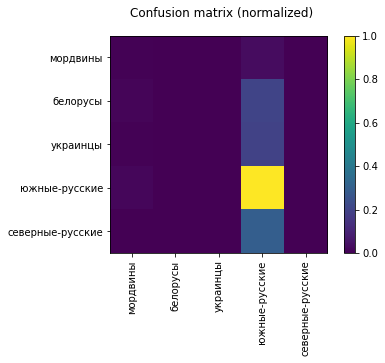

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [112]:
inputs = np.zeros((num, num))
names = ['?' for i in range(num)]
for i, n in enumerate(df['node_id1']):
    row = int(n.split('_')[1])
    col = int(df['node_id2'][i].split('_')[1])
    names[row] = n
    names[col] = df['node_id2'][i]
    inputs[row, col] = df['ibd_sum'][i]
    inputs[col, row] = df['ibd_sum'][i]

targets = get_targets(df, 0.9, names)

label_prop_model = LabelSpreading(kernel='rbf', n_neighbors=10, max_iter=10000, tol=1e-3, n_jobs=-1, gamma=0.0005)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

print(predicted)

##############################

unlabeled_targets = np.array(targets) == -1

targets = np.array(get_targets(df, 2, names)) # second number - whatever number > 1 because we need to select all data

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets[unlabeled_targets], predicted[unlabeled_targets], labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

### Old approach

{'мордвины': 24, 'белорусы': 162, 'украинцы': 149, 'южные-русские': 761, 'северные-русские': 220}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
{'мордвины': 70, 'белорусы': 424, 'украинцы': 389, 'южные-русские': 2160, 'северные-русские': 628}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        46
           1       0.34      0.56      0.42       262
           2       0.21      0.90      0.35       240
           3       0.94      0.51      0.66      1399
           4       0.89      0.31      0.46       408

    accuracy                           0.51      2355
   macro avg       0.68      0.47      0.39      2355
weighted avg       0.79      0.51      0.56      2355

[[   2   12   38    4   14]
 [   0  247  114   59    4]
 [   0   29  320   36    4]
 [   0  182  502 1466   10]
 [  

<Figure size 432x288 with 0 Axes>

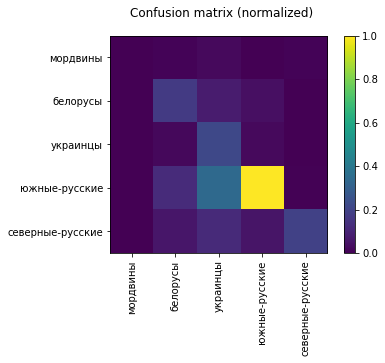

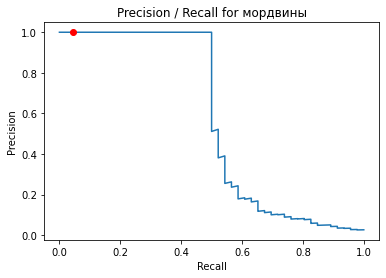

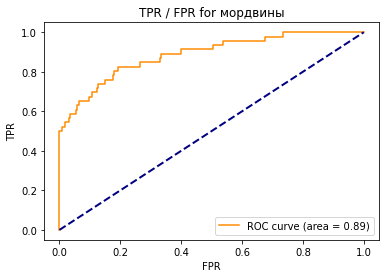

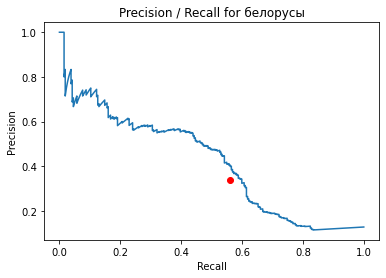

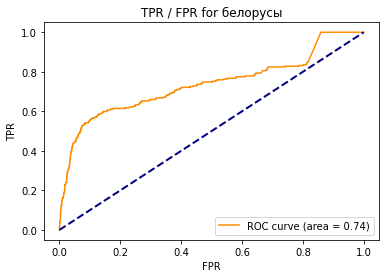

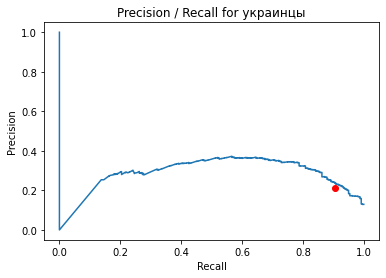

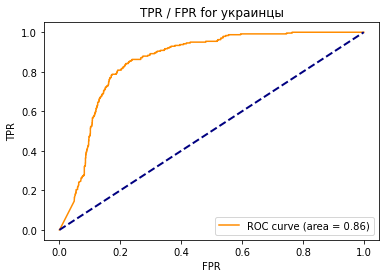

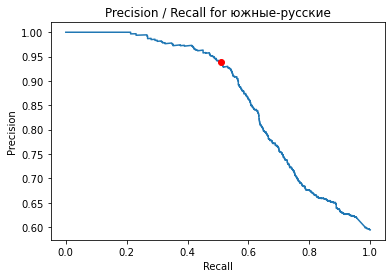

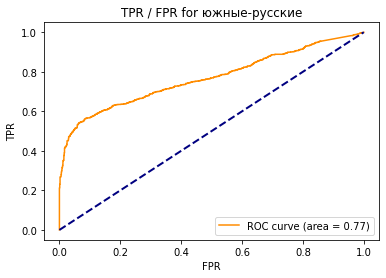

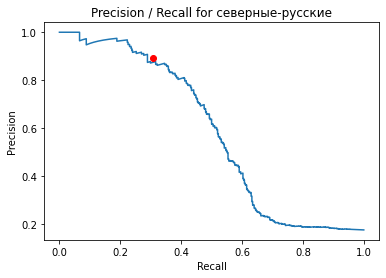

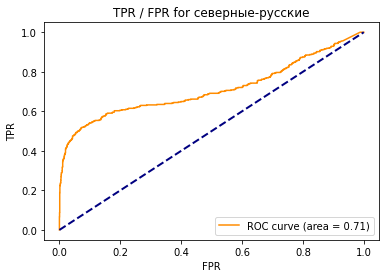

In [35]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
            
    print(current_types_dict)
    print(all_types_dict)
        
    return nodes_dict

data = get_dataset(df, 0.35) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

label_prop_model = LabelSpreading(kernel='knn', n_neighbors=200, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=0.001)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

# Tensorflow

In [21]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, Concatenate, Dropout, BatchNormalization
import gc

In [41]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    selection = []
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
                selection.append(id_)
            else:
                selection.append(-1)
            nodes_dict[n] = [types_dict.copy(), id_]
            
        
    return nodes_dict, np.array(selection)

data, selection = get_dataset(df, 0.7)

inputs = np.array([list(i[0].values()) for i in list(data.values())])
targets = np.array([i[1] for i in list(data.values())])

train_inputs = inputs[selection != -1]
train_targets = targets[selection != -1]

test_inputs = inputs[selection == -1]
test_targets = targets[selection == -1]

train_targets

array([0, 0, 0, ..., 2, 2, 2])

In [69]:
inputs = Input(shape =(5,))

x0 = Dense(1024, activation = 'relu')(inputs)
x1 = Dense(1024, activation = 'relu')(inputs)
x2 = Dense(1024, activation = 'relu')(inputs)
x3 = Dense(1024, activation = 'relu')(inputs)

x = Concatenate()([
                x0, 
                x1, 
                x2,
                x3
               ])

x = Dense(5, activation = 'softmax')(x)

model = Model(inputs, x)

In [70]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_34 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                           

In [71]:
gc.collect()

lr = ReduceLROnPlateau(
                    monitor = "val_loss",
                    factor = 0.9, 
                    patience = 4, 
                    verbose = 0)

es = EarlyStopping(
                    monitor = "val_loss",
                    patience = 40, 
                    verbose = 0,
                    mode = "min", 
                    restore_best_weights = True)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                    filepath = './genotek',
                    save_weights_only = True,
                    monitor = 'val_loss',
                    mode = 'min',
                    save_best_only = True)

callbacks = [
                    lr, 
                    es, 
                    model_checkpoint_callback
                    ]

model.compile(
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = 'acc',
                loss = tf.keras.losses.SparseCategoricalCrossentropy()
                 )

    
model.fit(train_inputs,
                train_targets, 
                validation_data=(test_inputs,
                                test_targets), 
                epochs = 1000,
                verbose = 1,
                batch_size = 16,
                shuffle = True,
                callbacks = callbacks)

model.load_weights('./genotek')

predicted = np.argmax(model.predict(test_inputs), axis=1)

print(classification_report(test_targets, predicted))

Epoch 1/1000
165/165 [==============================] - 1s 5ms/step - loss: 5.6681 - acc: 0.8014 - val_loss: 4.1274 - val_acc: 0.3877 - lr: 0.0100
Epoch 2/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.4504 - acc: 0.8489 - val_loss: 3.3604 - val_acc: 0.3770 - lr: 0.0100
Epoch 3/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.5584 - acc: 0.8421 - val_loss: 4.8949 - val_acc: 0.3703 - lr: 0.0100
Epoch 4/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4622 - acc: 0.8462 - val_loss: 4.8226 - val_acc: 0.3934 - lr: 0.0100
Epoch 5/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4546 - acc: 0.8542 - val_loss: 4.2798 - val_acc: 0.3664 - lr: 0.0100
Epoch 6/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4398 - acc: 0.8622 - val_loss: 3.9673 - val_acc: 0.3838 - lr: 0.0100
Epoch 7/1000
165/165 [==============================] - 1s 3ms/step - loss: 0.4081 - acc: 0.8580 - val_loss: 4.8862 - 

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Torch Geometric

In [3]:
import torch
print(torch.__version__)
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

1.13.0+cu116


## Vanillia example

In [4]:
import networkx as nx
from torch_geometric.utils.convert import from_networkx

In [180]:
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 0, 'x': [[0.5], [0.8], [0.9]]}),
      (2, {'y': 0, 'x': [[0.2], [0.8], [0.9]]}),
      (3, {'y': 1, 'x': [[0.3], [0.8], [0.9]]}),
      (4, {'y': 1, 'x': [[0.1], [0.8], [0.9]]}),
      (5, {'y': 1, 'x': [[0.2], [0.8], [0.9]]}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])

# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

pyg_graph.num_classes = 2

print(pyg_graph.num_features)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)
# tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
#         [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


# # Split the data 
# train_ratio = 0.2
# num_nodes = pyg_graph.x.shape[0]
# num_train = int(num_nodes * train_ratio)
# idx = [i for i in range(num_nodes)]

# np.random.shuffle(idx)
# train_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# train_mask[idx[:num_train]] = True
# test_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# test_mask[idx[num_train:]] = True

# print(train_mask)
# # tensor([ True, False, False, False, False])
# print(test_mask)
# # tensor([False,  True,  True,  True,  True])

1
Data(x=[5, 3, 1], edge_index=[2, 12], y=[5], num_classes=2)
tensor([[[0.5000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]],

        [[0.3000],
         [0.8000],
         [0.9000]],

        [[0.1000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]]])
tensor([0, 0, 1, 1, 1])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


In [184]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features*3, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        print('GOOGLE1')
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        print('GOOGLE2')
        return F.log_softmax(x, dim=1)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(device)

data =  pyg_graph.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

cpu
GOOGLE1


RuntimeError: index 3 is out of bounds for dimension 0 with size 3

Testing vanilia example on different graph size

In [208]:
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 0, 'x': [[0.5], [0.8], [0.9]]}),
      (2, {'y': 0, 'x': [[0.2], [0.8], [0.9]]}),
      (3, {'y': 1, 'x': [[0.3], [0.8], [0.9]]}),
      (4, {'y': 1, 'x': [[0.1], [0.8], [0.9]]}),
      (5, {'y': 1, 'x': [[0.2], [0.8], [0.9]]}),
      (6, {'y': 0, 'x': [[0.7], [0.1], [0.7]]}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3), (5,2), (6, 1),
])

#G.add_weighted_edges_from

# Convert the graph into PyTorch geometric
pyg_graph_big = from_networkx(G)
pyg_graph_big.edge_index

tensor([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5],
        [1, 3, 4, 5, 0, 2, 3, 4, 1, 4, 0, 1, 0, 1, 2, 0]])

In [179]:
model.eval()
model(pyg_graph_big.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (18x1 and 3x16)

## Real example from scratch

In [5]:
from numba import njit, prange
import time

Raw data

In [6]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


Function for getting train and test nodes

In [40]:
def get_train_test_nodes(df, train_coeff):
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
    print("TYPES: ", types)
    
    # concatenate all nodes in one column
    n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
    
    # concatenate all labels in one column
    l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
    
    # merge all nodes and all labels column-wise
    df_new = pd.concat([n, l], axis=1)
    
    # get class for every node 
    df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
    df_new = df_new.drop_duplicates()
    node_classes_random = df_new.sample(frac=1)
    node_classes_sorted = df_new.sort_values(by=[0])
    
    # get number of nodes for every class
    num_nodes_per_class = node_classes_random.iloc[:, 1].value_counts()
    
    train_nodes, test_nodes = [], []
    node_counter = {i:0 for i in range(num_nodes_per_class.shape[0])}
    
    # split nodes
    for i in range(node_classes_random.shape[0]):
        node_class = node_classes_random.iloc[i, 1]
        if node_counter[node_class] < int(train_coeff * num_nodes_per_class.loc[node_class]):
            train_nodes.append(node_classes_random.iloc[i, 0])
            node_counter[node_class] += 1
        else:
            test_nodes.append(node_classes_random.iloc[i, 0])
    
    return train_nodes, test_nodes, node_classes_sorted

def make_train_test_dataset(df, train_nodes, test_nodes, node_classes_sorted):
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
    print("TYPES: ", types)
    
    # preprocess initial data
    df_processed = df.copy()
    df_processed.iloc[:, 0] = df_processed.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 1] = df_processed.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 2] = df_processed.iloc[:, 2].apply(lambda t: types.index(t))
    df_processed.iloc[:, 3] = df_processed.iloc[:, 3].apply(lambda t: types.index(t))
    
    # making dataframe with only training nodes
    df_for_training = df_processed.copy()
    drop_rows = []
    for i in range(df_for_training.shape[0]):
        if i % 1000 == 0:
            print(f'Processed {i} / {df_for_training.shape[0]} lines for training dataset')
        row = df_for_training.iloc[[i]]
        if int(row.iloc[0, 0]) in test_nodes or int(row.iloc[0, 1]) in test_nodes:
            drop_rows.append(i)
    df_for_training = df_for_training.drop(drop_rows)
    
    # construct training graph ############################# SAME PART BELOW ##############################
    
    # calculate sum of idb for each training node
    sum_training_idb = {i:[0 for j in range(len(types))] for i in train_nodes}
    
    for i in range(df_for_training.shape[0]):
        row = df_for_training.iloc[[i]]
        sum_training_idb[int(row.iloc[0, 0])][int(row.iloc[0, 3])] += row.iloc[0, 4]
        sum_training_idb[int(row.iloc[0, 1])][int(row.iloc[0, 2])] += row.iloc[0, 4]
                
    # construct nodes
    train_graph_nodes = []
    for i, node in enumerate(train_nodes):
        train_graph_nodes.append((node, {'y': node_classes_sorted.iloc[node, 1], 'x': sum_training_idb[node]}))
        
    # construct edges
    train_graph_weighted_edges = []
    for i in range(df_for_training.shape[0]):
        row = df_for_training.iloc[[i]]
        train_graph_weighted_edges.append((int(row.iloc[0, 0]), int(row.iloc[0, 1]), row.iloc[0, 4]))
            
    # define empty train graph
    train_graph = nx.Graph()
    
    # fill the train graph
    train_graph.add_nodes_from(train_graph_nodes)
    train_graph.add_weighted_edges_from(train_graph_weighted_edges)
    
    # convert train graph to pytorch_geometric format
    train_graph_pytorch = from_networkx(train_graph)
    train_graph_pytorch.num_classes = len(types)
    
    ############################# SAME PART UP ##############################
    
    # creating array of graphs for testing
    
    array_of_graphs_for_testing = []
    
    print('Starting selecting lines...')
    
    start = time.time()
    
    rows_for_adding_per_node = select_lines(np.array(train_nodes), np.array(test_nodes), df_processed.to_numpy())
    
    end = time.time()
    
    print(f'Done selecting lines in {end-start} seconds')
    
    for k, test_node in enumerate(test_nodes):
        
        print(f'Processed {k} / {len(test_nodes)} nodes')
        
        rows_for_adding = rows_for_adding_per_node[k]
                
        df_for_testing = pd.concat([df_for_training, df_processed.iloc[rows_for_adding]], axis=0)
        
        current_test_nodes = train_nodes + [test_node]
        
        # construct testing graph ############################# SAME PART BELOW ##############################
    
        start = time.time()
    
        # calculate sum of idb for each training node
#         sum_testing_idb = {i:[0 for j in range(len(types))] for i in current_test_nodes}
        sum_testing_idb = np.zeros((len(current_test_nodes), len(types)))
    
        sum_testing_idb = calculate_sum_of_idb_for_each_training_node(np.array(current_test_nodes), sum_testing_idb, df_for_testing.to_numpy())

#         for i in range(df_for_testing.shape[0]):
#             row = df_for_testing.iloc[[i]]
#             sum_testing_idb[int(row.iloc[0, 0])][int(row.iloc[0, 3])] += row.iloc[0, 4]
#             sum_testing_idb[int(row.iloc[0, 1])][int(row.iloc[0, 2])] += row.iloc[0, 4]
            
        print(f'calculate sum of idb for each training node: {time.time() - start}')
        
        start = time.time()

        # construct nodes
        test_graph_nodes = []
        for i, node in enumerate(current_test_nodes):
            test_graph_nodes.append((node, {'y': node_classes_sorted.iloc[node, 1], 'x': sum_testing_idb[i]}))
            
        print(f'construct nodes: {time.time() - start}')
        
        start = time.time()

        # construct edges
        test_graph_weighted_edges = construct_edges(df_for_testing.to_numpy())
#         test_graph_weighted_edges = []
#         for i in range(df_for_testing.shape[0]):
#             row = df_for_testing.iloc[[i]]
#             test_graph_weighted_edges.append((int(row.iloc[0, 0]), int(row.iloc[0, 1]), row.iloc[0, 4]))
            
        print(f'construct edges: {time.time() - start}')
        
        start = time.time()

        # define empty test graph
        test_graph = nx.Graph()

        # fill the train graph
        test_graph.add_nodes_from(test_graph_nodes)
        test_graph.add_weighted_edges_from(test_graph_weighted_edges)

        # convert train graph to pytorch_geometric format
        test_graph_pytorch = from_networkx(test_graph)
        test_graph_pytorch.num_classes = len(types)
        
        array_of_graphs_for_testing.append(test_graph_pytorch)
        
        print(f'build pytorch geometric dataset: {time.time() - start}')
        
        ############################# SAME PART UP ##############################
    
    return train_graph_pytorch, array_of_graphs_for_testing

In [41]:
@njit(cache=True)
def select_lines(train_nodes, test_nodes, df_processed):
    
    rows_for_adding_per_node = []
    
    for i in range(len(test_nodes)):
        tmp = []
        for j in range(df_processed.shape[0]):
            row = df_processed[j]
            if int(row[0]) == test_nodes[i] and int(row[1]) in train_nodes or int(row[1]) == test_nodes[i] and int(row[0]) in train_nodes:
                
                tmp.append(j)
                
        rows_for_adding_per_node.append(tmp)
    
    return rows_for_adding_per_node


@njit(cache=True)
def calculate_sum_of_idb_for_each_training_node(current_test_nodes, sum_testing_idb, df_for_testing):
    
    current_test_nodes = list(current_test_nodes)
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        sum_testing_idb[current_test_nodes.index(int(row[0])), int(row[3])] += row[4]
        sum_testing_idb[current_test_nodes.index(int(row[1])), int(row[2])] += row[4]
    
    return sum_testing_idb


@njit(cache=True)
def construct_edges(df_for_testing):
    
    test_graph_weighted_edges = []
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        test_graph_weighted_edges.append((int(row[0]), int(row[1]), row[4]))
        
    return test_graph_weighted_edges

In [43]:
tr, ts, nks = get_train_test_nodes(df, 0.9)
data, test_graphs = make_train_test_dataset(df, tr, ts, nks)

TYPES:  ['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
TYPES:  ['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
Processed 0 / 67503 lines for training dataset
Processed 1000 / 67503 lines for training dataset
Processed 2000 / 67503 lines for training dataset
Processed 3000 / 67503 lines for training dataset
Processed 4000 / 67503 lines for training dataset
Processed 5000 / 67503 lines for training dataset
Processed 6000 / 67503 lines for training dataset
Processed 7000 / 67503 lines for training dataset
Processed 8000 / 67503 lines for training dataset
Processed 9000 / 67503 lines for training dataset
Processed 10000 / 67503 lines for training dataset
Processed 11000 / 67503 lines for training dataset
Processed 12000 / 67503 lines for training dataset
Processed 13000 / 67503 lines for training dataset
Processed 14000 / 67503 lines for training dataset
Processed 15000 / 67503 lines for training dataset
Processed 16000 / 67503 lines for

build pytorch geometric dataset: 0.5933692455291748
Processed 21 / 379 nodes
calculate sum of idb for each training node: 0.08736538887023926
construct nodes: 0.054062604904174805
construct edges: 0.006447792053222656
build pytorch geometric dataset: 0.5945272445678711
Processed 22 / 379 nodes
calculate sum of idb for each training node: 0.08684062957763672
construct nodes: 0.053646087646484375
construct edges: 0.0059812068939208984
build pytorch geometric dataset: 0.5999321937561035
Processed 23 / 379 nodes
calculate sum of idb for each training node: 0.08730888366699219
construct nodes: 0.054064273834228516
construct edges: 0.0064775943756103516
build pytorch geometric dataset: 0.5978226661682129
Processed 24 / 379 nodes
calculate sum of idb for each training node: 0.08681344985961914
construct nodes: 0.05556631088256836
construct edges: 0.006448268890380859
build pytorch geometric dataset: 0.5926744937896729
Processed 25 / 379 nodes
calculate sum of idb for each training node: 0.086

build pytorch geometric dataset: 0.5967121124267578
Processed 59 / 379 nodes
calculate sum of idb for each training node: 0.08687496185302734
construct nodes: 0.05606222152709961
construct edges: 0.006448268890380859
build pytorch geometric dataset: 0.6049187183380127
Processed 60 / 379 nodes
calculate sum of idb for each training node: 0.08730888366699219
construct nodes: 0.055552005767822266
construct edges: 0.0064487457275390625
build pytorch geometric dataset: 0.599808931350708
Processed 61 / 379 nodes
calculate sum of idb for each training node: 0.08681321144104004
construct nodes: 0.05507087707519531
construct edges: 0.006447792053222656
build pytorch geometric dataset: 0.5988733768463135
Processed 62 / 379 nodes
calculate sum of idb for each training node: 0.08727192878723145
construct nodes: 0.05457329750061035
construct edges: 0.006448984146118164
build pytorch geometric dataset: 0.5983471870422363
Processed 63 / 379 nodes
calculate sum of idb for each training node: 0.0868129

build pytorch geometric dataset: 0.5939154624938965
Processed 97 / 379 nodes
calculate sum of idb for each training node: 0.08681416511535645
construct nodes: 0.05406546592712402
construct edges: 0.0069730281829833984
build pytorch geometric dataset: 0.5993688106536865
Processed 98 / 379 nodes
calculate sum of idb for each training node: 0.08684468269348145
construct nodes: 0.05515480041503906
construct edges: 0.006447315216064453
build pytorch geometric dataset: 0.5963454246520996
Processed 99 / 379 nodes
calculate sum of idb for each training node: 0.0863642692565918
construct nodes: 0.05456233024597168
construct edges: 0.006448030471801758
build pytorch geometric dataset: 0.5969738960266113
Processed 100 / 379 nodes
calculate sum of idb for each training node: 0.08735513687133789
construct nodes: 0.05608940124511719
construct edges: 0.0064754486083984375
build pytorch geometric dataset: 0.5926229953765869
Processed 101 / 379 nodes
calculate sum of idb for each training node: 0.08689

build pytorch geometric dataset: 0.5963966846466064
Processed 135 / 379 nodes
calculate sum of idb for each training node: 0.0873100757598877
construct nodes: 0.05606222152709961
construct edges: 0.006447792053222656
build pytorch geometric dataset: 0.5990879535675049
Processed 136 / 379 nodes
calculate sum of idb for each training node: 0.08730840682983398
construct nodes: 0.05555248260498047
construct edges: 0.006944179534912109
build pytorch geometric dataset: 0.5958764553070068
Processed 137 / 379 nodes
calculate sum of idb for each training node: 0.08687472343444824
construct nodes: 0.05606198310852051
construct edges: 0.006448268890380859
build pytorch geometric dataset: 0.609673261642456
Processed 138 / 379 nodes
calculate sum of idb for each training node: 0.08736443519592285
construct nodes: 0.055055856704711914
construct edges: 0.006448268890380859
build pytorch geometric dataset: 0.5963351726531982
Processed 139 / 379 nodes
calculate sum of idb for each training node: 0.0873

construct edges: 0.1441662311553955
build pytorch geometric dataset: 0.6011078357696533
Processed 173 / 379 nodes
calculate sum of idb for each training node: 0.08733868598937988
construct nodes: 0.05364274978637695
construct edges: 0.006478071212768555
build pytorch geometric dataset: 0.5969133377075195
Processed 174 / 379 nodes
calculate sum of idb for each training node: 0.08779263496398926
construct nodes: 0.05556511878967285
construct edges: 0.006944179534912109
build pytorch geometric dataset: 0.6017696857452393
Processed 175 / 379 nodes
calculate sum of idb for each training node: 0.08730864524841309
construct nodes: 0.05556535720825195
construct edges: 0.006945371627807617
build pytorch geometric dataset: 0.5963714122772217
Processed 176 / 379 nodes
calculate sum of idb for each training node: 0.08828902244567871
construct nodes: 0.05556511878967285
construct edges: 0.006972312927246094
build pytorch geometric dataset: 0.6123924255371094
Processed 177 / 379 nodes
calculate sum 

build pytorch geometric dataset: 0.7362899780273438
Processed 211 / 379 nodes
calculate sum of idb for each training node: 0.08681321144104004
construct nodes: 0.05515551567077637
construct edges: 0.006971597671508789
build pytorch geometric dataset: 0.6014211177825928
Processed 212 / 379 nodes
calculate sum of idb for each training node: 0.0873253345489502
construct nodes: 0.0550692081451416
construct edges: 0.007936239242553711
build pytorch geometric dataset: 0.6052906513214111
Processed 213 / 379 nodes
calculate sum of idb for each training node: 0.08730912208557129
construct nodes: 0.05556607246398926
construct edges: 0.006944179534912109
build pytorch geometric dataset: 0.6004126071929932
Processed 214 / 379 nodes
calculate sum of idb for each training node: 0.08742785453796387
construct nodes: 0.056015729904174805
construct edges: 0.006944179534912109
build pytorch geometric dataset: 0.5984179973602295
Processed 215 / 379 nodes
calculate sum of idb for each training node: 0.0873

build pytorch geometric dataset: 0.6022319793701172
Processed 249 / 379 nodes
calculate sum of idb for each training node: 0.08780479431152344
construct nodes: 0.055552005767822266
construct edges: 0.007439851760864258
build pytorch geometric dataset: 0.736417293548584
Processed 250 / 379 nodes
calculate sum of idb for each training node: 0.08730912208557129
construct nodes: 0.055552005767822266
construct edges: 0.006944417953491211
build pytorch geometric dataset: 0.5989401340484619
Processed 251 / 379 nodes
calculate sum of idb for each training node: 0.08780527114868164
construct nodes: 0.05556654930114746
construct edges: 0.006943702697753906
build pytorch geometric dataset: 0.604386568069458
Processed 252 / 379 nodes
calculate sum of idb for each training node: 0.08739137649536133
construct nodes: 0.055553436279296875
construct edges: 0.007439851760864258
build pytorch geometric dataset: 0.595538854598999
Processed 253 / 379 nodes
calculate sum of idb for each training node: 0.087

build pytorch geometric dataset: 0.5796933174133301
Processed 287 / 379 nodes
calculate sum of idb for each training node: 0.08681249618530273
construct nodes: 0.05604910850524902
construct edges: 0.006943702697753906
build pytorch geometric dataset: 0.5816473960876465
Processed 288 / 379 nodes
calculate sum of idb for each training node: 0.08882546424865723
construct nodes: 0.05606269836425781
construct edges: 0.006943702697753906
build pytorch geometric dataset: 0.7183990478515625
Processed 289 / 379 nodes
calculate sum of idb for each training node: 0.08631753921508789
construct nodes: 0.05604815483093262
construct edges: 0.006944417953491211
build pytorch geometric dataset: 0.5807037353515625
Processed 290 / 379 nodes
calculate sum of idb for each training node: 0.08582115173339844
construct nodes: 0.05456137657165527
construct edges: 0.007453441619873047
build pytorch geometric dataset: 0.5810754299163818
Processed 291 / 379 nodes
calculate sum of idb for each training node: 0.087

build pytorch geometric dataset: 0.5765466690063477
Processed 325 / 379 nodes
calculate sum of idb for each training node: 0.08532547950744629
construct nodes: 0.052576303482055664
construct edges: 0.006968021392822266
build pytorch geometric dataset: 0.5820345878601074
Processed 326 / 379 nodes
calculate sum of idb for each training node: 0.08582186698913574
construct nodes: 0.05556607246398926
construct edges: 0.006944179534912109
build pytorch geometric dataset: 0.5825507640838623
Processed 327 / 379 nodes
calculate sum of idb for each training node: 0.08730769157409668
construct nodes: 0.05606245994567871
construct edges: 0.14087939262390137
build pytorch geometric dataset: 0.5797133445739746
Processed 328 / 379 nodes
calculate sum of idb for each training node: 0.08730888366699219
construct nodes: 0.05606436729431152
construct edges: 0.00793600082397461
build pytorch geometric dataset: 0.582449197769165
Processed 329 / 379 nodes
calculate sum of idb for each training node: 0.08730

build pytorch geometric dataset: 0.5799415111541748
Processed 363 / 379 nodes
calculate sum of idb for each training node: 0.08888459205627441
construct nodes: 0.0560910701751709
construct edges: 0.0069427490234375
build pytorch geometric dataset: 0.5957937240600586
Processed 364 / 379 nodes
calculate sum of idb for each training node: 0.08784985542297363
construct nodes: 0.05609393119812012
construct edges: 0.007471799850463867
build pytorch geometric dataset: 0.5864031314849854
Processed 365 / 379 nodes
calculate sum of idb for each training node: 0.0863180160522461
construct nodes: 0.05704188346862793
construct edges: 0.005952119827270508
build pytorch geometric dataset: 0.7186248302459717
Processed 366 / 379 nodes
calculate sum of idb for each training node: 0.08631730079650879
construct nodes: 0.054064273834228516
construct edges: 0.007439851760864258
build pytorch geometric dataset: 0.5895090103149414
Processed 367 / 379 nodes
calculate sum of idb for each training node: 0.087310

In [11]:
import numba
numba.__version__

'0.55.1'

In [39]:
from numba import njit

@njit
def foo(x):
    a = []
    for i in x:
        a.append((i, 1))
        
#     a = list(np.array(a))
#     a[0] = a.index(5)
    return a

foo(np.array([3, 4, 5]))

[(3, 1), (4, 1), (5, 1)]

In [9]:
df.iloc[[1, 2]]

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
1,node_0,node_10,мордвины,мордвины,11.6322,1
2,node_0,node_11,мордвины,мордвины,23.9044,2


In [12]:
a = [1, 2]
a + [3]

[1, 2, 3]

Training

In [84]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

In [87]:
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 64)
        self.conv2 = GCNConv(64, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.relu(self.conv1(x, edge_index, edge_attr))
        x = self.conv2(x, edge_index, edge_attr)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Define optimizer.

def evaluation(model, test_graphs):
    model.eval()
    y_true = []
    y_pred = []

    for i in range(len(test_graphs)):
        y_pred.append(np.argmax(F.softmax(model(test_graphs[i].to(device))[-1], dim=0).cpu().detach().numpy()))
        y_true.append(test_graphs[i].y[-1].cpu().detach())
    
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print(f1_score(y_true, y_pred, average='weighted'))
    model.train()
    

def train(data, log_step, num_epochs, test_graphs):
    model.train()
    data =  data.to(device)
    for i in range(num_epochs):
        if i % log_step == 0:
            print(f'Step {i}')
            evaluation(model, test_graphs)
        optimizer.zero_grad()  # Clear gradients.
        out= model(data)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

train(data, 1000, 20000, test_graphs)

model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

Step 0


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       0.12      0.85      0.21        47
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00       218
           4       0.10      0.05      0.06        64

    accuracy                           0.13       379
   macro avg       0.13      0.38      0.18       379
weighted avg       0.04      0.13      0.05       379

[[  7   0   0   0   0]
 [  0  40   1   0   6]
 [  4  30   0   0   9]
 [  5 200   0   0  13]
 [  0  61   0   0   3]]
0.04815320521230932
Step 1000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.22      0.09      0.12        47
           2       0.78      0.33      0.46        43
           3       0.77      0.94      0.84       218
           4       0.77      0.86      0.81        64

    accuracy                           

Step 13000
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.74      0.74      0.74        47
           2       0.87      0.77      0.81        43
           3       0.93      0.97      0.95       218
           4       0.90      0.84      0.87        64

    accuracy                           0.90       379
   macro avg       0.89      0.84      0.86       379
weighted avg       0.90      0.90      0.90       379

[[  6   0   0   0   1]
 [  0  35   3   7   2]
 [  0   3  33   6   1]
 [  0   3   1 212   2]
 [  0   6   1   3  54]]
0.8957444531761132
Step 14000
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.74      0.74      0.74        47
           2       0.87      0.77      0.81        43
           3       0.93      0.97      0.95       218
           4       0.90      0.84      0.87        64

    accuracy                

Testing

In [62]:
model.eval()

Net(
  (conv1): GCNConv(5, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 5)
)

In [69]:
from sklearn.metrics import f1_score
y_true = []
y_pred = []

for i in range(len(test_graphs)):
    y_pred.append(np.argmax(F.softmax(model(test_graphs[i])[-1], dim=0).cpu().detach().numpy()))
    y_true.append(test_graphs[i].y[-1])
    
print(classification_report(y_true, y_pred))

print(confusion_matrix(y_true, y_pred))

print(f1_score(y_true, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      0.02      0.04        47
           2       0.83      0.12      0.20        43
           3       0.70      0.99      0.82       218
           4       0.89      0.78      0.83        64

    accuracy                           0.73       379
   macro avg       0.78      0.58      0.58       379
weighted avg       0.73      0.73      0.66       379

[[  7   0   0   0   0]
 [  0   1   1  43   2]
 [  0   0   5  36   2]
 [  0   1   0 215   2]
 [  0   0   0  14  50]]
0.6576256956227116


In [54]:
test_graphs[0].y

tensor([3, 3, 4,  ..., 1, 1, 3])

## Real example (old)

In [82]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
df_new.iloc[:, 1].to_numpy()

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
class MyDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(MyDataset, self).__init__('.', transform, None, None)

        df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
        types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

        edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
        edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)
        
        n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
        l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
        df_new = pd.concat([n, l], axis=1)
        df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
        df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
        df_new = df_new.sort_values(by=[0])
        df_new = df_new.drop_duplicates()
        y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

        for i in range(df.shape[0]):
            edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
            edge_attr[i] = df.iloc[i, 4]

        data = Data(edge_attr=edge_attr, edge_index=edge_index, y=y)
        
        print(data)
        
        data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
        data.num_classes = len(types)

#         # splitting the data into train, validation and test
#         X_train, X_test, y_train, y_test = train_test_split(edge_attr, 
#                                                             y,
#                                                             test_size=0.30, 
#                                                             random_state=42)
        
#         n_nodes = len(y)
        
#         # create train and test masks for data
#         train_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         test_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         train_mask[X_train.index] = True
#         test_mask[X_test.index] = True
#         data['train_mask'] = train_mask
#         data['test_mask'] = test_mask

#         self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)



dataset = MyDataset()
print(dataset)
data = dataset[0]

Data(edge_index=[2, 67503], edge_attr=[67503], y=[3767])
MyDataset()


In [34]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)

n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

for i in range(df.shape[0]):
    edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
    edge_attr[i] = df.iloc[i, 4]

data = Data(x=torch.from_numpy(np.expand_dims(df_new.iloc[:, 1].to_numpy(), axis=-1)).type(torch.float), edge_attr=edge_attr, edge_index=edge_index, y=y)

data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
data.num_classes = len(types)

In [35]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, edge_index):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data.edge_index)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

tensor(2.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6992, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2880, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2385, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2168, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2021, device='cuda:0', grad_fn=

tensor(1.0949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0995, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0993, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0975, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1005, device='cuda:0', grad_fn=

tensor(1.0863, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0919, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0884, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0874, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0881, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0872, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0864, device='cuda:0', grad_fn=

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=2)
X, y = np.arange(18).reshape((6, 3)), [0, 0, 0, 0, 1, 1]

a, b = split.split(X, y)
X[a[0]]

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [15, 16, 17]])

In [35]:
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)

NameError: name 'StratifiedKFold' is not defined

In [18]:
edge_index.t().contiguous()

tensor([[   0,    5],
        [   0,   10],
        [   0,   11],
        ...,
        [3749, 3764],
        [3754, 3755],
        [3758, 3766]])

[How to get rbf_kernel_safe](https://stackoverflow.com/questions/52057836/labelpropagation-how-to-avoid-division-by-zero)

# NC

In [81]:
df = pd.read_csv(r"C:\HSE\genotek\NC_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_1,чеченцы,чеченцы,9.76537,1
1,node_0,node_13,чеченцы,чеченцы,26.49970,3
2,node_0,node_15,чеченцы,чеченцы,8.31678,1
3,node_0,node_594,чеченцы,чеченцы,8.64458,1
4,node_1,node_8,чеченцы,чеченцы,8.14209,1
...,...,...,...,...,...,...
6292,node_624,node_629,ингуши,осетины,11.24220,1
6293,node_624,node_630,ингуши,чеченцы,14.70900,2
6294,node_625,node_628,осетины,осетины,8.26460,1
6295,node_625,node_629,осетины,осетины,8.91348,1


In [82]:
len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())

614

## Get distribution

In [83]:
nodes_names = set()
all_types_dict = {}

types = df['label_id1'].unique().tolist()

for t in types:
    all_types_dict[t] = 0

for i, n in enumerate(df['node_id1']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id1'][i]] += 1
        
for i, n in enumerate(df['node_id2']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id2'][i]] += 1
        
print(all_types_dict)

{'чеченцы': 95, 'кабардинцы,черкесы,адыгейцы': 148, 'карачаевцы,балкарцы': 86, 'ингуши': 52, 'дагестанские народы': 134, 'осетины': 52, 'кумыки': 18, 'ногайцы': 29}


## Training and results

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        74
           1       0.87      0.67      0.76       111
           2       0.98      0.75      0.85        67
           3       1.00      0.43      0.60        42
           4       0.50      0.97      0.66        80
           5       0.94      0.42      0.59        40
           6       1.00      0.27      0.43        11
           7       0.78      0.41      0.54        17

    accuracy                           0.72       442
   macro avg       0.85      0.61      0.65       442
weighted avg       0.81      0.72      0.71       442

{'0': {'precision': 0.693069306930693, 'recall': 0.9459459459459459, 'f1-score': 0.8, 'support': 74}, '1': {'precision': 0.8705882352941177, 'recall': 0.6666666666666666, 'f1-score': 0.7551020408163265, 'support': 111}, '2': {'precision': 0.9803921568627451, 'recall': 0.746268656716418, 'f1-score': 0.847457627118644, 'support': 67}, '3': {'precisi

<Figure size 432x288 with 0 Axes>

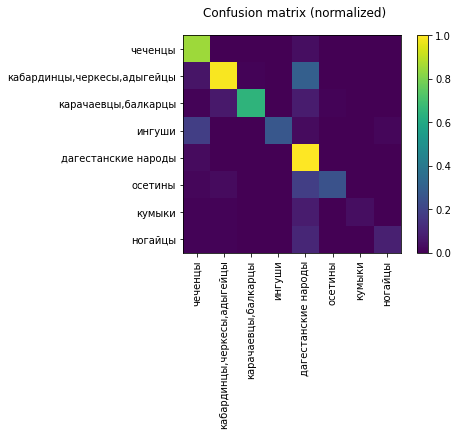

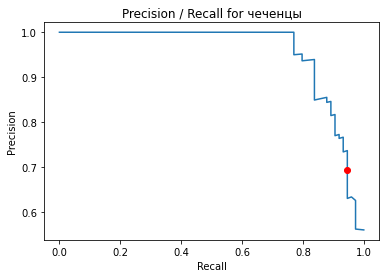

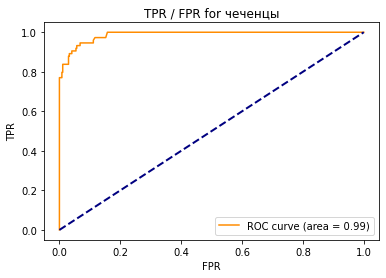

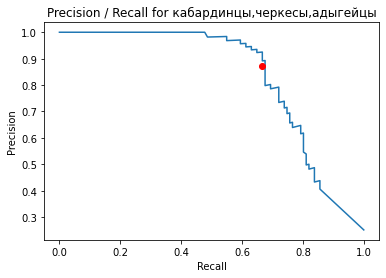

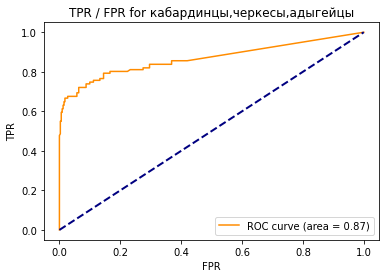

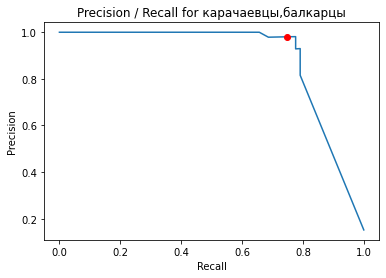

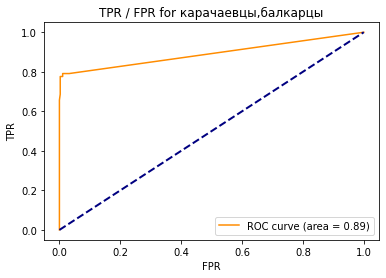

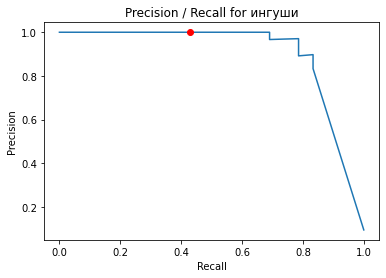

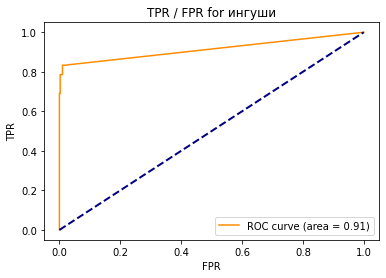

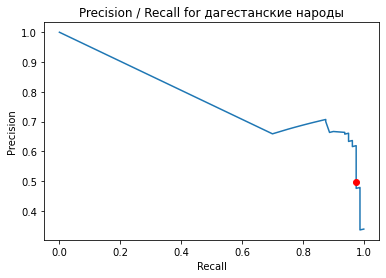

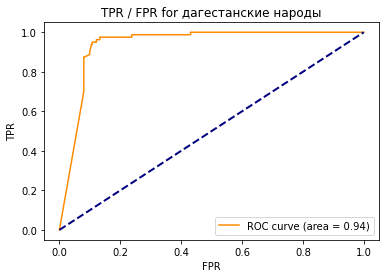

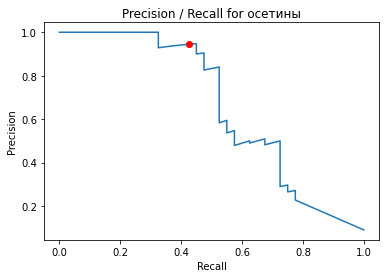

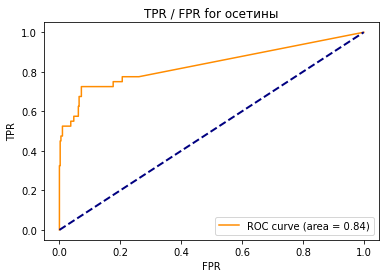

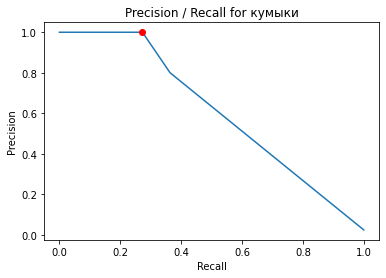

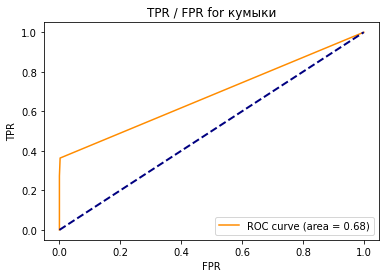

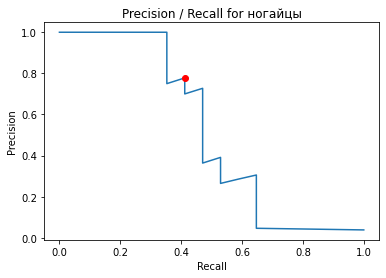

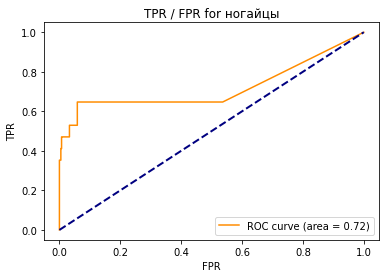

In [91]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
        
    return nodes_dict

data = get_dataset(df, 0.2) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

# label_prop_model = LabelSpreading(kernel=rbf_kernel_safe, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=200)
label_prop_model = LabelSpreading(kernel='knn', max_iter=1000, tol=1e-3, n_jobs=-1, n_neighbors=11, gamma=100)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(8)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(8)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_nc.png", bbox_inches="tight")
plt.show()

for i in range(8):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()